# Deploying Your Model
In this exercise, we'll expose new images to our model and see how it does

## Loading the Model
Let's load the saved model that we trained. Modify the code below to point to the model you select.  

In [1]:
from tensorflow import keras

# note that you will need to update this model name 
model = keras.models.load_model('model_b_save_kp64_e30_augtrue_ftfalse.h5')

If you'd like to, you can see the summary of the model.

In [2]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 257)               131841    
Total params: 14,846,529
Trainable params: 14,846,529
Non-trainable params: 0
_________________________________________________________________


### Showing the Images

When we use our model to make predictions on new images, it will be useful to show the image as well. We can use the matplotlib library to do this.

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

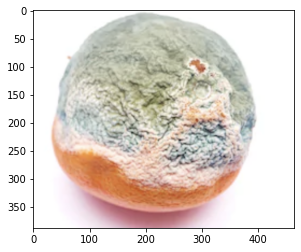

In [4]:
#uncomment the lines below to see a few of the testing set images

#show_image('/data/cs2300/L9/fruits/test/freshapples/Screen Shot 2018-06-08 at 4.59.44 PM.png')
#show_image('/data/cs2300/L9/fruits/test/freshbanana/Screen Shot 2018-06-12 at 9.49.00 PM.png')
#show_image('/data/cs2300/L9/fruits/test/freshoranges/Screen Shot 2018-06-12 at 11.56.55 PM.png')
#show_image('/data/cs2300/L9/fruits/test/rottenapples/Screen Shot 2018-06-07 at 2.15.34 PM.png')
#show_image('/data/cs2300/L9/fruits/test/rottenbanana/Screen Shot 2018-06-12 at 9.28.04 PM.png')
show_image('/data/cs2300/L9/fruits/train/rottenoranges/Screen Shot 2018-06-12 at 11.47.08 PM.png')

### Scaling the Images

The images in our dataset were 224x224 pixels. We need to make sure to pass the same size images into our method for prediction. There are a few ways to edit images with Python, but Keras has a built-in utility that works well. 

In [5]:
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, target_size=(224,224))
    return image

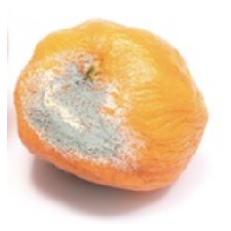

In [6]:
image = load_and_scale_image('/data/cs2300/L9/fruits/test/freshapples/Screen Shot 2018-06-08 at 4.59.44 PM.png')
#image = load_and_scale_image('/data/cs2300/L9/fruits/test/freshbanana/Screen Shot 2018-06-12 at 9.49.00 PM.png')
#image = load_and_scale_image('/data/cs2300/L9/fruits/test/freshoranges/Screen Shot 2018-06-12 at 11.56.55 PM.png')
#image = load_and_scale_image('/data/cs2300/L9/fruits/test/rottenapples/Screen Shot 2018-06-07 at 2.15.34 PM.png')
#image = load_and_scale_image('/data/cs2300/L9/fruits/test/rottenbanana/Screen Shot 2018-06-12 at 9.28.04 PM.png')
image = load_and_scale_image('/data/cs2300/L9/fruits/test/rottenoranges/Screen Shot 2018-06-12 at 11.31.39 PM.png')
plt.axis('off')
plt.imshow(image)

### Preparing the Image for Prediction

Now that we have the right size image, we're close to being ready to pass it into our model for prediction. First we need to reshape our image to match the shape of the dataset the model was trained on. Before we can reshape, we need to convert our image into a more rudimentary format. We'll do this with a keras utility called image_to_array.

In [7]:
image = image_utils.img_to_array(image)

Now we can reshape our image and scale it (preprocess) to get it ready for prediction.

In [8]:
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)

## Making Predictions

Okay, now we're ready to predict! This is done by passing our pre-processed image into the model's predict method. 

In [9]:
prediction = model.predict(image)
print(prediction)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Understanding the Prediction

The predictions are in the format of a length 6 array. Each element of the array is a probability between 0 and 1, representing the confidence for each category. Let's make it a little more readable. We can start by finding which element of the array represents the highest probability. Fill in the following cell using numpy to find the largest value.  

In [10]:
np.argmax(prediction)

247

In [11]:
dictionary = {}
dictionary[0] = 'apple'
dictionary[1] = 'banana'
dictionary[2] = 'orange'
dictionary[3] = 'rotten apple'
dictionary[4] = 'rotten banana'
dictionary[5] = 'rotten orange'

We can now pass in our prediction index to find the corresponding letter.

In [12]:
#dictionary[np.argmax(prediction)]
#dictionary = {actual : [times correctly predicted, times occured]}

In the next cell, we demonstrate how to find all the files in a directory that match a given pattern (png images).  For each class (e.g., apple, rotten apple, etc.) in our testing data set, alter the code below to calculate the accuracy of your model on that class. Report the accuracy per class along with the total number of images in the testing set for that class.

In [13]:
import glob, os
results = {}
files = glob.glob('/data/cs2300/caltech256/**/**/*.jpg', recursive=True)
for file in files:
    
    category = os.path.basename(file)
    numerical_cat = int(category.split('_')[0])
    
    #category
    #print(category)
    file = load_and_scale_image(file)
    file = image_utils.img_to_array(file)
    file = file.reshape((1, file.shape[0], file.shape[1], file.shape[2]))
    file = preprocess_input(file)
    predictions = model.predict(file)
    highest_percentage_prediction = np.argmax(predictions)
    hpp = highest_percentage_prediction + 1
    #print(f'{hpp}, Actual: {numerical_cat}' )
    if numerical_cat in results:
        results[numerical_cat][1] += 1
        if numerical_cat == hpp:
            results[numerical_cat][0] += 1
    else:
        results[numerical_cat] = [0,0]
    
    
    

    # print(f'Prediction: {highest_percentage_prediction}      Actual: {category}')
    
    
    
    
print(results)
    

{253: [862, 869], 13: [173, 195], 37: [199, 239], 124: [143, 181], 170: [142, 203], 123: [211, 221], 90: [339, 423], 62: [163, 165], 73: [193, 199], 200: [177, 199], 197: [159, 199], 89: [138, 219], 110: [125, 169], 130: [155, 181], 97: [147, 177], 135: [121, 185], 17: [187, 207], 158: [257, 297], 187: [168, 189], 100: [175, 185], 198: [183, 215], 161: [151, 205], 113: [217, 231], 236: [151, 193], 254: [173, 189], 164: [197, 201], 176: [159, 219], 29: [190, 205], 96: [451, 569], 21: [229, 283], 183: [187, 199], 39: [92, 169], 59: [116, 165], 148: [291, 347], 45: [145, 169], 218: [151, 161], 32: [187, 201], 36: [167, 211], 75: [143, 165], 217: [185, 209], 159: [174, 417], 23: [193, 219], 115: [125, 175], 181: [126, 199], 101: [217, 275], 143: [197, 259], 2: [143, 193], 154: [169, 205], 229: [179, 189], 42: [77, 173], 177: [159, 191], 65: [181, 201], 246: [157, 201], 60: [133, 173], 82: [103, 161], 204: [129, 159], 233: [147, 199], 78: [75, 179], 221: [149, 205], 174: [131, 167], 107: [1

In [14]:
for key in results:
    print(f'{key} Accuracy: {results[key][0] / results[key][1] * 100}')
    print(f'Number of images for this category: {results[key][1]}')

253 Accuracy: 99.1944764096663
Number of images for this category: 869
13 Accuracy: 88.71794871794872
Number of images for this category: 195
37 Accuracy: 83.26359832635984
Number of images for this category: 239
124 Accuracy: 79.00552486187846
Number of images for this category: 181
170 Accuracy: 69.95073891625616
Number of images for this category: 203
123 Accuracy: 95.47511312217195
Number of images for this category: 221
90 Accuracy: 80.1418439716312
Number of images for this category: 423
62 Accuracy: 98.7878787878788
Number of images for this category: 165
73 Accuracy: 96.98492462311557
Number of images for this category: 199
200 Accuracy: 88.94472361809045
Number of images for this category: 199
197 Accuracy: 79.89949748743719
Number of images for this category: 199
89 Accuracy: 63.013698630136986
Number of images for this category: 219
110 Accuracy: 73.96449704142012
Number of images for this category: 169
130 Accuracy: 85.6353591160221
Number of images for this category: 181
9

In [22]:
import pandas as pd

df = pd.DataFrame.from_dict(results, orient='index')
df['accuracy'] = df[0] / df[1]
df.head(20)
df.sort_values(by = 'accuracy', ascending=False)

,0,1,accuracy
252,231,231,1.000000
20,165,165,1.000000
253,862,869,0.991945
250,189,191,0.989529
145,1577,1595,0.988715
...,...,...,...
144,68,163,0.417178
257,662,1653,0.400484
108,56,169,0.331361
185,54,205,0.263415
